# Healthcare Analysis

#### Core Business Problem:
How can hospital management improve on their resource allocation and functioning based on severity of patient and improve the existing functionality
Looking at the past severity of patients medical condition how can hospital be prepared to handle emergency cases.
The length of stay (LOS) is an important indicator of the efficiency of hospital management. Reduction in the number of inpatient days results in decreased risk of infection and medication side effects, improvement in the quality of treatment, and increased hospital profit with more efficient bed management.

#### Data Science Problem:
Predict how long patient is going to stay in hospital as per severity of illness

#### Pain point :
Allocation of resources at unknown emergency --If patient is going to stay in hospital for longer time than expected then hospital management might not be able to accomodate other critical patient

#### Evaluation Metric

The evaluation metric for this task will be accuracy_score.

# Required Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.metrics import accuracy_score,r2_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [4]:
#read data
data = pd.read_csv('train_data.csv')
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


# Exploratory Data Analysis

In [5]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [6]:
for col in data.columns:
    print(col)

case_id
Hospital_code
Hospital_type_code
City_Code_Hospital
Hospital_region_code
Available Extra Rooms in Hospital
Department
Ward_Type
Ward_Facility_Code
Bed Grade
patientid
City_Code_Patient
Type of Admission
Severity of Illness
Visitors with Patient
Age
Admission_Deposit
Stay


In [7]:
data.shape

(318438, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

### Check Missing Values

In [9]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [10]:
data['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [11]:
data['Bed Grade'].describe()

count    318325.000000
mean          2.625807
std           0.873146
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: Bed Grade, dtype: float64

In [12]:
#fill null values with mean

data['Bed Grade'].fillna(data['Bed Grade'].median(),inplace=True)

In [13]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [14]:
data['City_Code_Patient'].value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [15]:
data['City_Code_Patient'].describe()

count    313906.000000
mean          7.251859
std           4.745266
min           1.000000
25%           4.000000
50%           8.000000
75%           8.000000
max          38.000000
Name: City_Code_Patient, dtype: float64

In [16]:
data['City_Code_Patient'].fillna(data['City_Code_Patient'].median(),inplace=True)

In [17]:
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [18]:
data.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

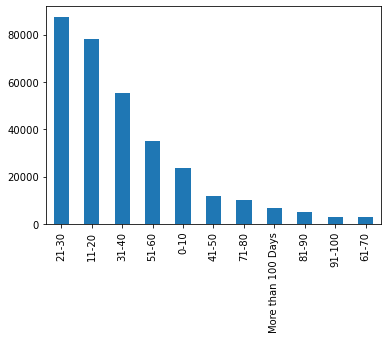

In [19]:
data.Stay.value_counts().plot(kind="bar")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

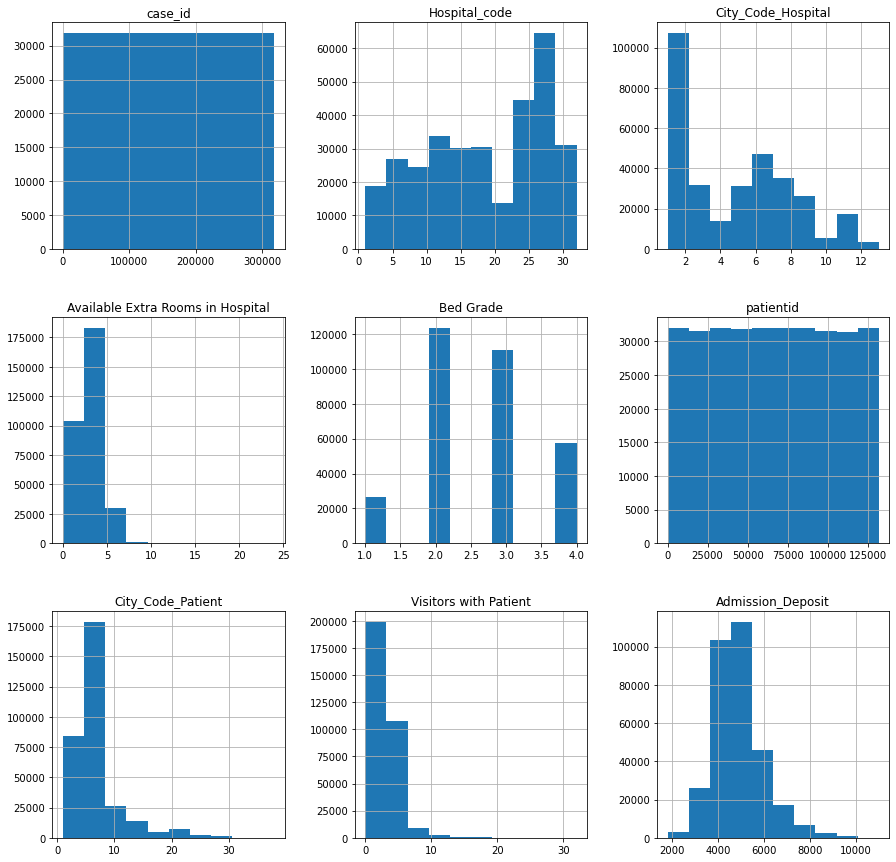

In [20]:
data.hist(figsize=(15,15))
plt.show

In [21]:
# case id pataientid has no use in training

# Outliers Detection

## using Boxplot

<AxesSubplot:>

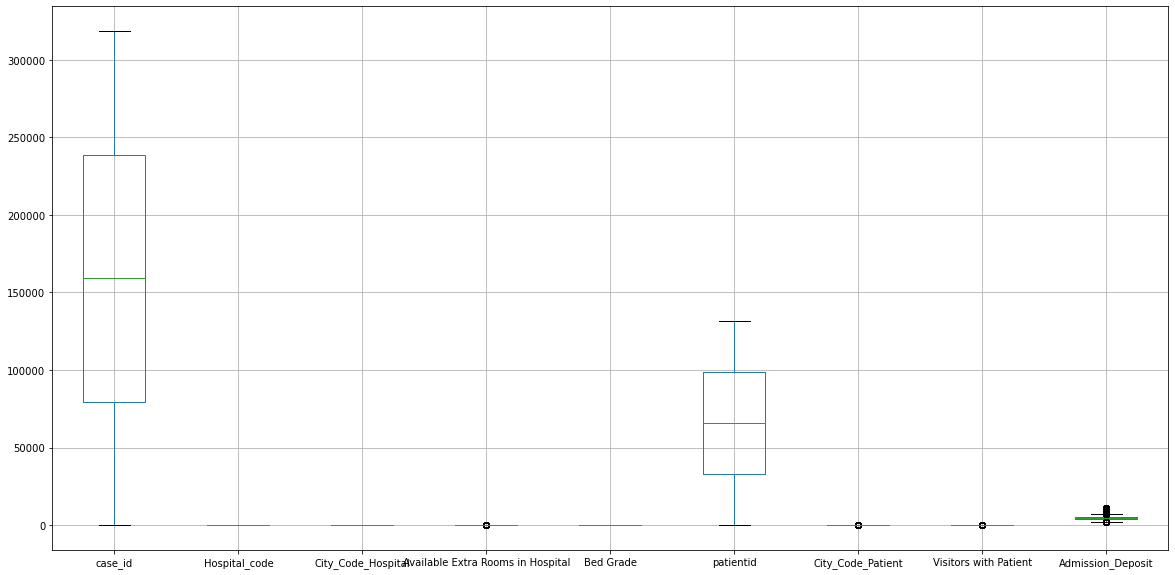

In [22]:
data.boxplot(figsize=(20,10))

<AxesSubplot:>

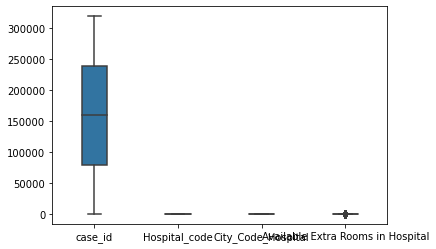

In [23]:
sns.boxplot(data=data.iloc[:,:6],width=0.3)

<AxesSubplot:>

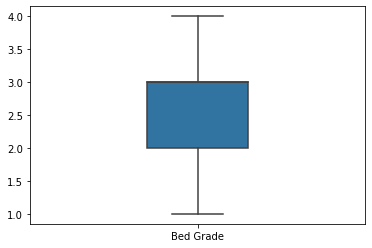

In [24]:
sns.boxplot(data=data.iloc[:,6:10],width=0.3)

<AxesSubplot:>

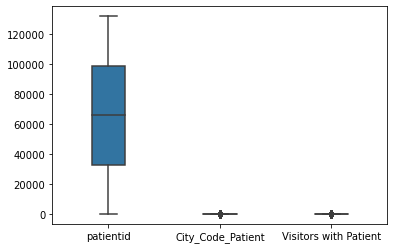

In [25]:
sns.boxplot(data=data.iloc[:,10:15],width=0.3)

<AxesSubplot:>

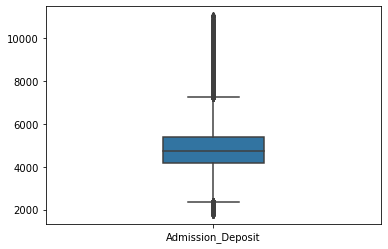

In [26]:
sns.boxplot(data=data.iloc[:,15:],width=0.3)

In [27]:
#sns.pairplot(data,hue='Stay')


# Outliers checking with IQR

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [29]:

Q1 = data.quantile(0.25)
Q1

case_id                              79610.25
Hospital_code                           11.00
City_Code_Hospital                       2.00
Available Extra Rooms in Hospital        2.00
Bed Grade                                2.00
patientid                            32847.00
City_Code_Patient                        4.00
Visitors with Patient                    2.00
Admission_Deposit                     4186.00
Name: 0.25, dtype: float64

In [30]:
Q3 = data.quantile(0.75)
Q3

case_id                              238828.75
Hospital_code                            26.00
City_Code_Hospital                        7.00
Available Extra Rooms in Hospital         4.00
Bed Grade                                 3.00
patientid                             98470.00
City_Code_Patient                         8.00
Visitors with Patient                     4.00
Admission_Deposit                      5409.00
Name: 0.75, dtype: float64

In [31]:
IQR = Q3 - Q1
print(IQR)

case_id                              159218.5
Hospital_code                            15.0
City_Code_Hospital                        5.0
Available Extra Rooms in Hospital         2.0
Bed Grade                                 1.0
patientid                             65623.0
City_Code_Patient                         4.0
Visitors with Patient                     2.0
Admission_Deposit                      1223.0
dtype: float64


In [32]:
data['Age'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [33]:
data['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

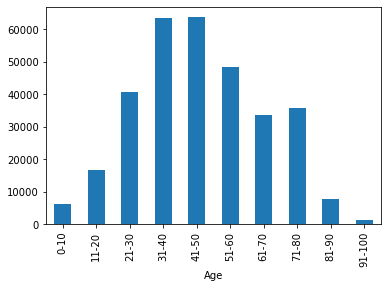

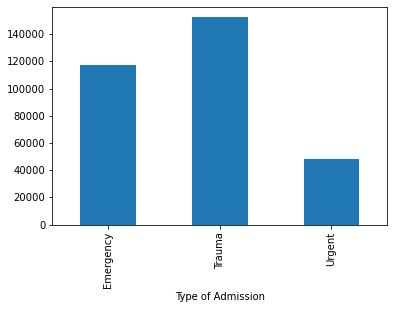

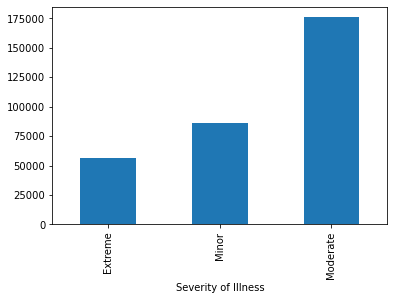

In [35]:
data.groupby('Age').size().plot.bar()
plt.show()
data.groupby('Type of Admission').size().plot.bar()
plt.show()
data.groupby('Severity of Illness').size().plot.bar()
plt.show()



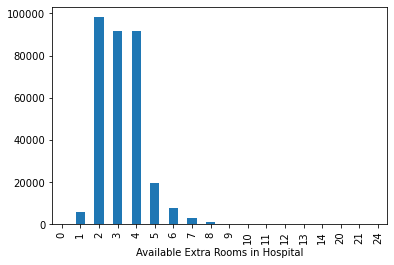

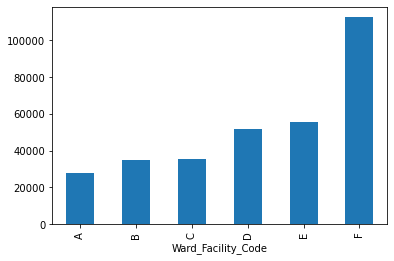

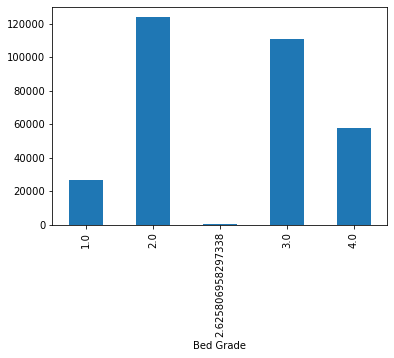

In [36]:
data.groupby('Available Extra Rooms in Hospital').size().plot.bar()
plt.show()

data.groupby('Ward_Facility_Code').size().plot.bar()
plt.show()

data.groupby('Bed Grade').size().plot.bar()
plt.show()



In [38]:
data_corr = data.corr()
data_corr

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,1.000000,-0.043023,-0.011352,0.042580,0.013701,-0.004150,0.064736,0.001309,-0.045972
Hospital_code,-0.043023,1.000000,0.128294,-0.059638,-0.013734,0.002291,-0.015421,-0.028500,0.045446
City_Code_Hospital,-0.011352,0.128294,1.000000,-0.045771,-0.049308,0.000750,-0.023819,0.018184,-0.034455
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.045771,1.000000,-0.115851,0.000921,-0.009610,0.096714,-0.143739
Bed Grade,0.013701,-0.013734,-0.049308,-0.115851,1.000000,0.001645,-0.008042,0.088936,0.073824
patientid,-0.004150,0.002291,0.000750,0.000921,0.001645,1.000000,0.001988,0.006889,-0.000877
City_Code_Patient,0.064736,-0.015421,-0.023819,-0.009610,-0.008042,0.001988,1.000000,-0.011971,0.025638
Visitors with Patient,0.001309,-0.028500,0.018184,0.096714,0.088936,0.006889,-0.011971,1.000000,-0.150358
Admission_Deposit,-0.045972,0.045446,-0.034455,-0.143739,0.073824,-0.000877,0.025638,-0.150358,1.000000


In [52]:
'''Correlation in the broadest sense is a measure of an association between variables. 
In correlated data, the change in the magnitude of 1 variable is associated with a change in the magnitude of
another variable, either in the same (positive correlation) or in the opposite (negative correlation) direction.'''

'Correlation in the broadest sense is a measure of an association between variables. \nIn correlated data, the change in the magnitude of 1 variable is associated with a change in the magnitude of\nanother variable, either in the same (positive correlation) or in the opposite (negative correlation) direction.'

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

<AxesSubplot:>

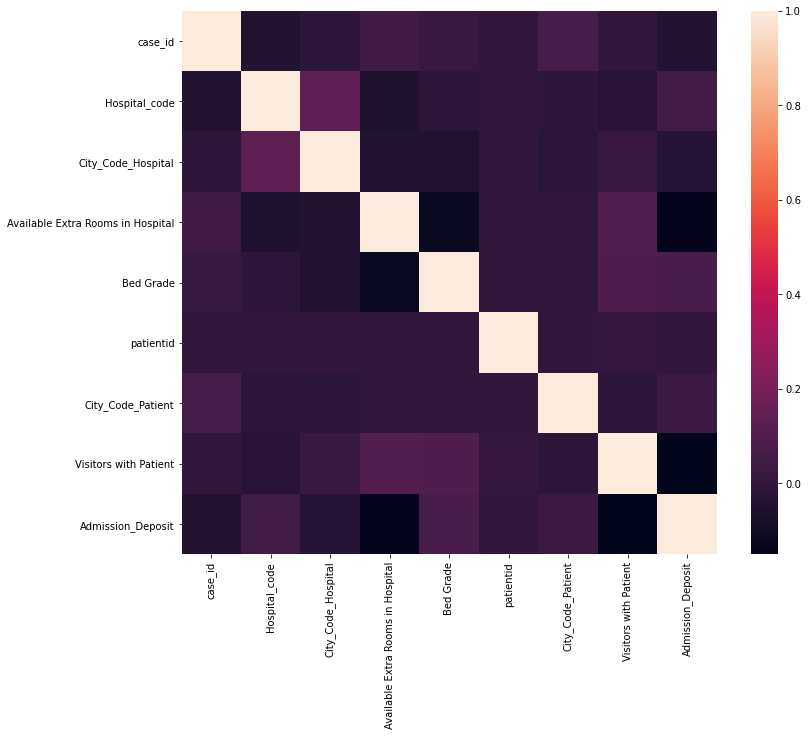

In [41]:
sns.heatmap(data.corr())  # (corr >= 0.5)

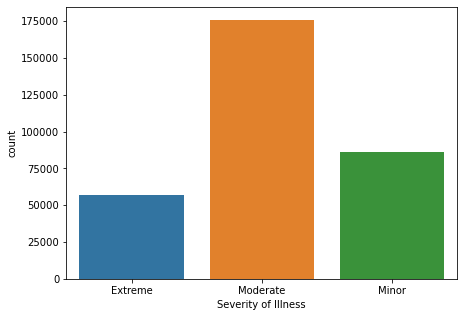

In [42]:
plt.figure(figsize=(7,5))
sns.countplot(x='Severity of Illness',data=data)
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Emergency'), Text(1, 0, 'Trauma'), Text(2, 0, 'Urgent')])

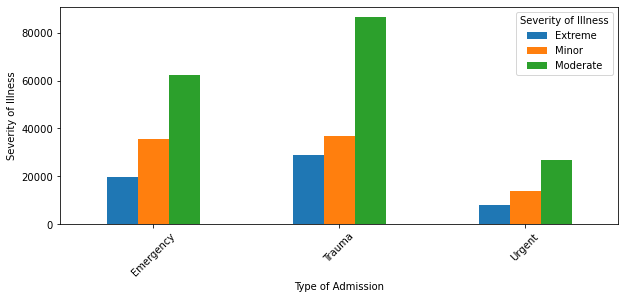

In [43]:
data.groupby("Type of Admission")['Severity of Illness'].value_counts().unstack().plot.bar(figsize=(10,4))
plt.ylabel("Severity of Illness")
plt.xticks(rotation=45)

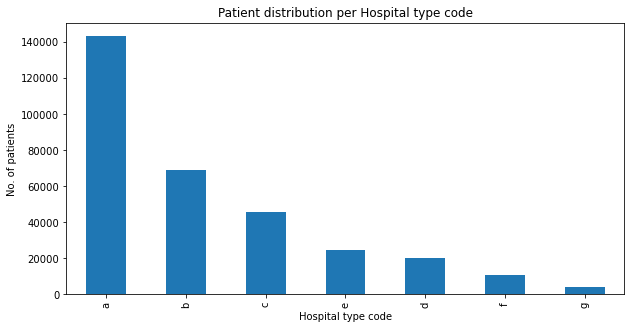

In [45]:
df_hosp_code = data['Hospital_type_code'].value_counts()

df_hosp_code.plot(kind = 'bar', 
                  xlabel = 'Hospital type code', ylabel = 'No. of patients',
                 title = 'Patient distribution per Hospital type code',
                 figsize =(10,5))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
hospital type A has a much higher patient case load when in comparison 
any of the other hospital codes. Hospital type G has the least case load. 
Hence, hospital type A has a much higher likelihood of running out of patient beds while G has the least.

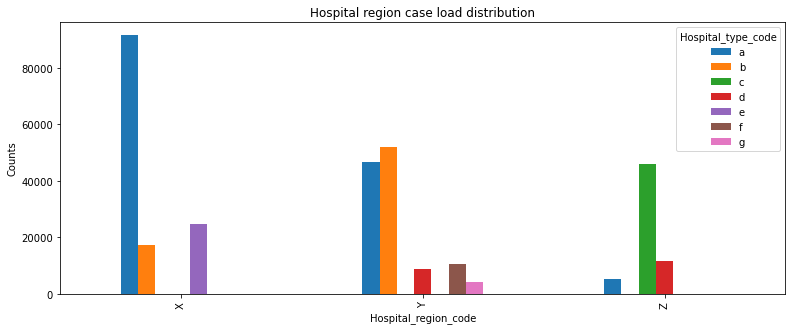

In [46]:
data.groupby('Hospital_region_code')['Hospital_type_code'].value_counts()\
.unstack().plot(kind = 'bar', figsize = (13,5),
                ylabel = 'Counts',
                title = 'Hospital region case load distribution' )
plt.show()

### INSIGHTS

As we can see from the above plot, 
the case loads in hospital region X is marginally higher than hospital region Y
and the least in region Z . 
For region X, 
the hospital type a had highest case load 
while it was more equally balanced between a and b in region Y.

For region Z, highest case loads were in hospital type c.
Hospitals in region X seem to show better distribution amogst all 
the hospital types.

For region Y, distribution between a and b is ideal but f,d and g have been
under utilised.
For Z, cases in hospital c were easily the highest but a and d are extremely 
under utilised.

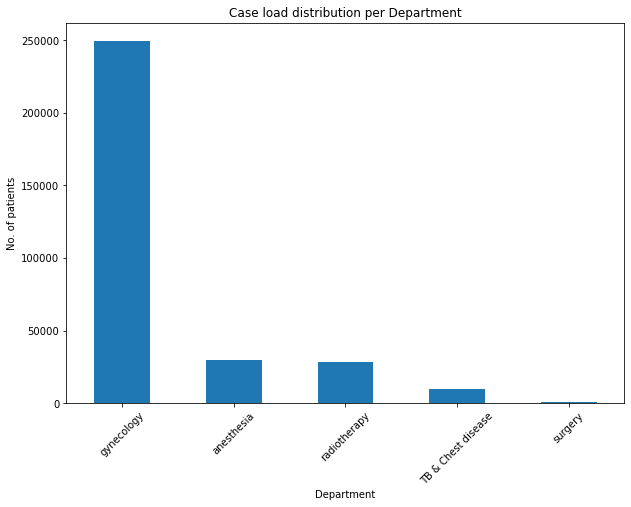

In [47]:
df_depart = data['Department'].value_counts()

df_depart.plot(kind = 'bar', 
                  xlabel = 'Department', ylabel = 'No. of patients',
                 title = 'Case load distribution per Department',
                 figsize =(10,7))
plt.xticks(rotation = 45)
plt.show()

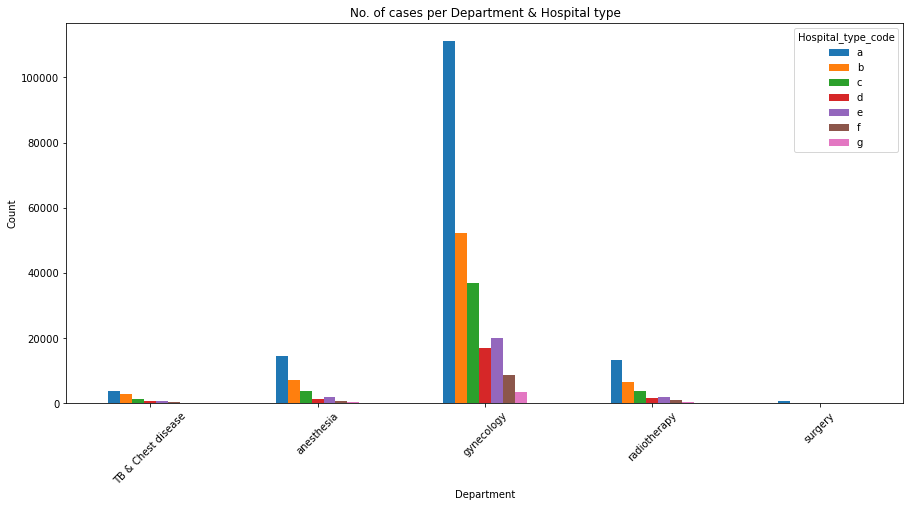

In [48]:
data.groupby("Department")['Hospital_type_code'].value_counts().unstack().plot.bar(figsize=(15,7))
plt.title('No. of cases per Department & Hospital type')
plt.ylabel("Count")
plt.xticks(rotation=45)

### Insights
Patient have prefered Type A hospital more compared to other types of hospital. 
Gynecology needs to considered important as patient inflow is more.



### Suggestion-
More beds need to be allocated for gynec department.
Medicine & surgical equipments inventory needs to adjusted considering 
more patients of gynec.



### Hospital type :
Type A - These hospitals provide comprehensive secondary and tertiary health care services 
and are referral centers for hospitals both in the public and 
private health systems.
Type B - These hospitals provide primary and secondary care services.
Type C - Type C hospitals provide primary care services and basic secondary care services

###  Encoding

In [56]:
health_data = data
health_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [57]:
le = LabelEncoder()
data['Stay'] = le.fit_transform(data['Stay'])
data['Age'] = le.fit_transform(data['Age'])

In [ ]:
need_to_encode = ['Hospital_type_code', 'Hospital_region_code','Ward_Facility_Code', 'Ward_Type']
for column in need_to_encode:
    le = LabelEncoder()
    le.fit(data[column])
    train_data[column] = le.transform(data[column])

In [58]:
# Dummies for Department column
df_dept=pd.get_dummies(data['Department'])
data=pd.merge(data, df_dept, on=data.index)
data.drop('key_0',axis=1,inplace=True)

# Dummies for Type of Admission column
df_adm = pd.get_dummies(data['Type of Admission'])
data = pd.merge(data, df_adm, on=data.index)
data.drop('key_0', axis=1, inplace=True)

#Dummies for Severity of Illness column
df_sev_ill = pd.get_dummies(data['Severity of Illness'])
data = pd.merge(data, df_sev_ill, on=data.index)
data.drop('key_0', axis=1, inplace=True)

In [59]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,anesthesia,gynecology,radiotherapy,surgery,Emergency,Trauma,Urgent,Extreme,Minor,Moderate
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,0,0,1,0,1,0,0,1,0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,0,0,1,0,0,1,0,1,0,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,...,1,0,0,0,0,1,0,1,0,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,...,0,0,1,0,0,1,0,1,0,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,...,0,0,1,0,1,0,0,0,0,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,...,1,0,0,0,0,0,1,0,0,1
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,...,0,1,0,0,1,0,0,0,1,0
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,...,1,0,0,0,0,1,0,0,1,0
